In [18]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import keras

country_map = {"Brazil": 1,"Canada":2,"Finland":3,"Japan":4,"United-Kingdom":5,"United_States":6,"Unlabeled":7}

train_dir = "./AI Dataset/train"
test_dir = "./AI Dataset/test"
valid_dir = "./AI Dataset/valid"
# @tf.autograph.experimental.do_not_convert
def normalize_img(image, label):
    return (tf.cast(image, tf.float32) / 255.0, label)
# @tf.autograph.experimental.do_not_convert
def resize(image, label):
    return (tf.image.resize(image, (224, 224)), label)

def load_dataset(directory, num_samples=None):
    img_dataset = []
    try:
        files_in_dir = os.listdir(directory)
        jpg_files = [file for file in files_in_dir if file.endswith(".jpg")][:num_samples]

        for jpg_file in jpg_files:
            full_path = os.path.join(directory, jpg_file)
            img = Image.open(full_path)
            img_array = np.array(img).astype(int)
            img_dataset.append(img_array)

    except FileNotFoundError:
        print(f"The directory '{directory}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

    return np.array(img_dataset)

def read_csv(directory, num_samples=None):
    try:
        label = pd.read_csv(directory + '/' + '_classes.csv')
        label = label.iloc[:, 1:8].idxmax(axis=1)[:num_samples]
        
        map_arr = []
        
        for i in range(len(label)):
            map_arr.append(np.array(country_map.get(label[i])) - 1)
        
        return np.array(map_arr)

        # return map_arr
    except FileNotFoundError:
        print(f"The directory '{directory}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

def preprocess_data(data, labels):
    data = tf.data.Dataset.from_tensor_slices((data, labels))
    data = data.map(resize, num_parallel_calls=tf.data.AUTOTUNE)
    data = data.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
    return data

def alexnet_model(input_shape=(224, 224, 3), num_classes = 7):
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                            strides=(4, 4), activation="relu", 
                            input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
    model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                            strides=(1, 1), activation="relu", 
                            padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                            strides=(1, 1), activation="relu", 
                            padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                            strides=(1, 1), activation="relu", 
                            padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                            strides=(1, 1), activation="relu", 
                            padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation="softmax"))
    return model

if __name__ == "__main__":
    divide_by = 8

    train_data = load_dataset(train_dir, num_samples=len(os.listdir(train_dir)) // divide_by)
    # test_data = load_dataset(test_dir, num_samples=len(os.listdir(test_dir)) // divide_by)

    train_labels = read_csv(train_dir, num_samples=len(os.listdir(train_dir)) // divide_by)
    # test_labels = read_csv(test_dir,  num_samples=len(os.listdir(test_dir)) // divide_by)

    

    # train_dataset = preprocess_data(train_data, train_labels)
    # test_dataset = preprocess_data(test_data, test_labels)
    
    # train_data, train_labels = shuffle(train_data, train_labels, random_state=42)
    # model = alexnet_model()

    # model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
    #           optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
    
    # batch_size = 16
    # epochs = 2

    # model.fit(
    #     train_data,
    #     train_labels,
    #     epochs = epochs,
    #     batch_size = batch_size,
    #     verbose = 2
    # )

    # model.evaluate(test_data,  test_labels, batch_size=batch_size, verbose=2)
    # model.save('cnn_model.h5')


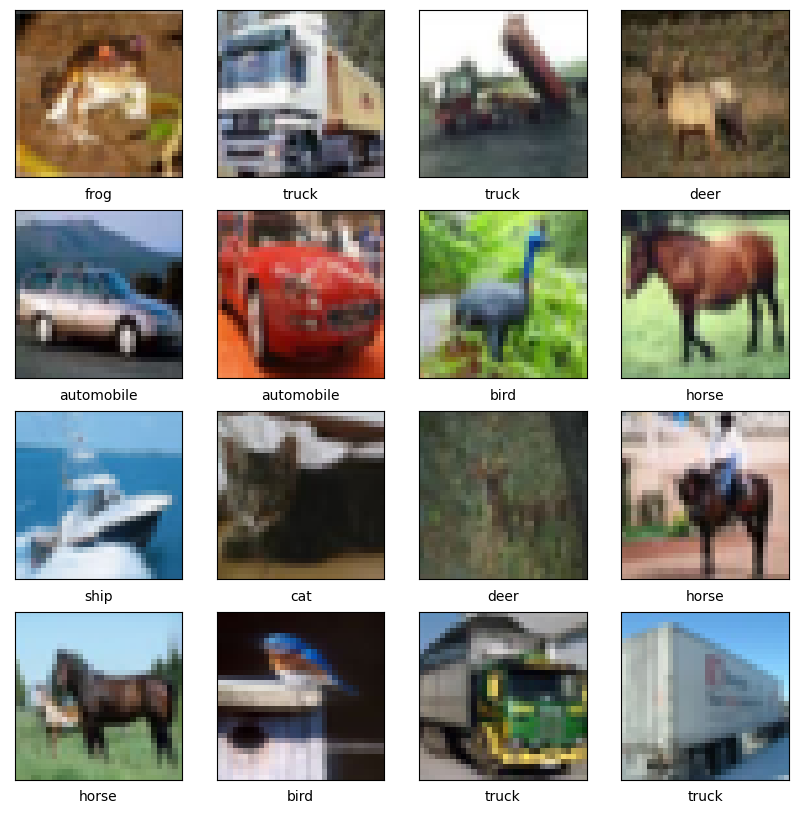

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

None
[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
  

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


KeyboardInterrupt: 

In [3]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# import matplotlib.pyplot as plt

# cifar10 = keras.datasets.cifar10

# (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# # print(train_images.shape) # 50000, 32, 32, 3

# # Normalize: 0,255 -> 0,1
# train_images, test_images = train_images / 255.0, test_images / 255.0

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']

# def show():
#     plt.figure(figsize=(10,10))
#     for i in range(16):
#         plt.subplot(4,4,i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(train_images[i], cmap=plt.cm.binary)
#         # The CIFAR labels happen to be arrays, 
#         # which is why you need the extra index
#         plt.xlabel(class_names[train_labels[i][0]])
#     plt.show()

# show()

# # model...
# model = keras.models.Sequential()
# model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)))
# model.add(layers.MaxPool2D((2,2)))
# model.add(layers.Conv2D(32, 3, activation='relu'))
# model.add(layers.MaxPool2D((2,2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))
# print(model.summary())
# #import sys; sys.exit()

# # loss and optimizer
# loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# optim = keras.optimizers.Adam(lr=0.001)
# metrics = ["accuracy"]

# model.compile(optimizer=optim, loss=loss, metrics=metrics)

# # training
# batch_size = 64
# epochs = 5

# print(train_images)

# model.fit(train_images, train_labels, epochs=epochs,
#           batch_size=batch_size, verbose=2)



# evaulate
# model.evaluate(test_images,  test_labels, batch_size=batch_size, verbose=2)